# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Adika Ahmad Hanif Nazhir
- Email: adikaahmad05@gmail.com
- Id Dicoding: adikaahmad

## Persiapan

### Menyiapkan library yang dibutuhkan

In [79]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sqlalchemy import create_engine

### Menyiapkan data yang akan diguankan

In [80]:
df = pd.read_csv('data.csv', delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

### Students' Performance
- **Marital Status** - (Categorical) - Marital Status of Student - 1 Single, 2 Married, 3 Widower, 4 Divorced, 5 Facto Union, 6 Legally Separated
- **Application Mode** - (Categorical) - Application used by the student
- **Application Order** - (Numerical) - Order student applied - 0 first choice ; 9 last choice
- **Course** - (Categorical) - Course taken by student
- **Day Time / Evening Attendance** - (Categorical) - Student attends class during day or evening - 1 daytime 0 evening
- **Previous qualification** - (Categorical) - enrolling in higher education
- **Previous qualification(grade)** - grade of previous qualification - between 0 and 200
- **Nationality** - (Categorical) - Nationality of Student
- **Mother's Qualification** - (Categorical) - Qualification of student's mother
- **Father's Qualification** - (Categorical) - Qualification of student's father
- **Mother's Occupation** -  (Categorical) - Occupation of student's mother
- **Father's Occupation** - (Categorical) - Occupation of student's father
- **Admission grade** - Admission Grade - between 0 and 200
- **Displaced** - (Categorical) - whether student is a displaced person - 1 yes 0 no
- **Educational Special Needs** - (Categorical) - whether student has any special educational needs - 1 yes 0 no
- **Debtor** - (categorical) - whether the student is a debtor - 1 yes 0 no
- **Tuition fees up to date** - (Categorical) - student's fees are up to date - 1 yes 0 no
- **Gender** - (categorical) - gender of the student - 1 yes 0 no
- **Scholarship holder** - (Categorical) - whether the student is a scholarship holder - 1 yes 0 no
- **Age at enrollment** - (Numerical) - The age of student at the time of enrollment
- **International** - (Categorical) - student is international student - 1 yes 0 no
- **Curricular units 1st sem (credited)** - (Numerical) - units credited by student in the 1st semester
- **Curricular units 1st sem (enrolled)** - (Numerical) - units enrolled by student in the 1st semester
- **Curricular units 1st sem (evaluations)** - (Numerical) - units evaluations by student in the 1st semester
- **Curricular units 1st sem (approved)** - (Numerical) - units approved by student in the 1st semester

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

### Mengecek nilai null pada data

In [82]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


### Mengecek duplikasi data

In [83]:
duplicated_count = df.duplicated().sum()
print("Total Duplikasi Data : ", duplicated_count)

Total Duplikasi Data :  0


Informasi :
- Data tidak memiliki nilai null dan duplikat

## Data Preparation / Preprocessing

In [84]:
uniques_values = df['Status'].unique()
print(uniques_values, "\n")

uniques_counts = df['Status'].value_counts()
print(uniques_counts)

['Dropout' 'Graduate' 'Enrolled'] 

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


- Drop nilai Enrolled karena tidak berhubungan dengan case yang akan dikerjakan

In [85]:
# Drop 'Enrolled' value in Status Column
df = df[df['Status'] != 'Enrolled']

# Check Value after drop
status_counts = df['Status'].value_counts()
print(status_counts)

Status
Graduate    2209
Dropout     1421
Name: count, dtype: int64


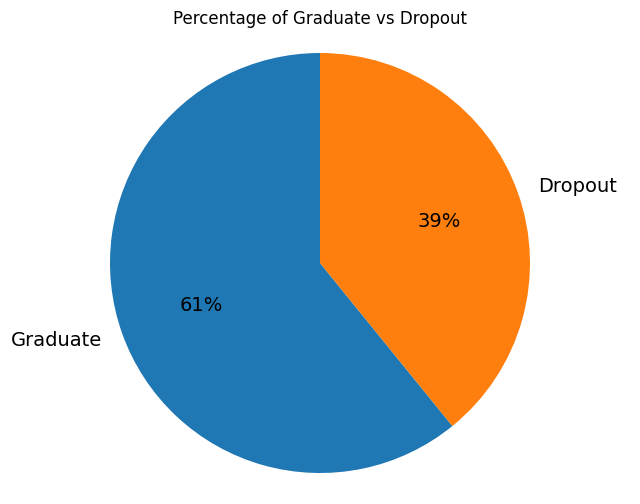

In [86]:
labels = status_counts.index #Get the Index ('Graduate', 'Dropout)
sizes = status_counts.values #Get the values (2209 for Graduate, 1421 for Dropout)

# Plotting
plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, startangle=90, autopct='%1.0f%%', textprops={'fontsize' : 14})
plt.title('Percentage of Graduate vs Dropout')
plt.axis('equal') #Membuat bentuk Pie Chart bulat sempurna
plt.show()

In [87]:
# Mengubah nilai kolom 'Status' menjadi numerik
df['Status'] = df['Status'].map({'Dropout':0, 'Graduate':1})
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [88]:
# Melihat nilai korelasi berdasarkan kolom Status
corr_df = df.corr()['Status'].sort_values(ascending=False)
corr_df

Status                                          1.000000
Curricular_units_2nd_sem_approved               0.653995
Curricular_units_2nd_sem_grade                  0.605350
Curricular_units_1st_sem_approved               0.554881
Curricular_units_1st_sem_grade                  0.519927
Tuition_fees_up_to_date                         0.442138
Scholarship_holder                              0.313018
Curricular_units_2nd_sem_enrolled               0.182897
Curricular_units_1st_sem_enrolled               0.161074
Admission_grade                                 0.128058
Displaced                                       0.126113
Curricular_units_2nd_sem_evaluations            0.119239
Previous_qualification_grade                    0.109464
Application_order                               0.094355
Daytime_evening_attendance                      0.084496
Curricular_units_1st_sem_evaluations            0.059786
Curricular_units_2nd_sem_credited               0.052402
GDP                            

- Semakin tinggi nilai korelasi, semakin berhubungan variabel tersebut dengan variable `Status`, dan sebaliknya semakin kecil korelasi maka semakin tidak berhubungan dengan variable `Status`

In [89]:
columns_list = ['Fathers_qualification','Educational_special_needs','Nacionality','Inflation_rate',
                'Mothers_qualification','Previous_qualification','Curricular_units_1st_sem_without_evaluations',
                'Marital_status','Curricular_units_2nd_sem_without_evaluations','Application_mode','Gender',
                'Debtor','Age_at_enrollment']

# Drop columns that has no correlation with `Status` variable
clean_df = df.drop(columns=columns_list)

In [90]:
corr_df.head()

Status                               1.000000
Curricular_units_2nd_sem_approved    0.653995
Curricular_units_2nd_sem_grade       0.605350
Curricular_units_1st_sem_approved    0.554881
Curricular_units_1st_sem_grade       0.519927
Name: Status, dtype: float64

In [91]:
clean_df.head()

,Application_order,Course,Daytime_evening_attendance,Previous_qualification_grade,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Tuition_fees_up_to_date,Scholarship_holder,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Unemployment_rate,GDP,Status
0,5,171,1,122.0,5,9,127.3,1,1,0,0,0,0,0,0,0.000000,0,0,0,0,0.000000,10.8,1.74,0
1,1,9254,1,160.0,3,3,142.5,1,0,0,0,0,6,6,6,14.000000,0,6,6,6,13.666667,13.9,0.79,1
2,5,9070,1,122.0,9,9,124.8,1,0,0,0,0,6,0,0,0.000000,0,6,0,0,0.000000,10.8,1.74,0
3,2,9773,1,122.0,5,3,119.6,1,1,0,0,0,6,8,6,13.428571,0,6,10,5,12.400000,9.4,-3.12,1
4,1,8014,0,100.0,9,9,141.5,0,1,0,0,0,6,9,5,12.333333,0,6,6,6,13.000000,13.9,0.79,1


In [92]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Application_order                     3630 non-null   int64  
 1   Course                                3630 non-null   int64  
 2   Daytime_evening_attendance            3630 non-null   int64  
 3   Previous_qualification_grade          3630 non-null   float64
 4   Mothers_occupation                    3630 non-null   int64  
 5   Fathers_occupation                    3630 non-null   int64  
 6   Admission_grade                       3630 non-null   float64
 7   Displaced                             3630 non-null   int64  
 8   Tuition_fees_up_to_date               3630 non-null   int64  
 9   Scholarship_holder                    3630 non-null   int64  
 10  International                         3630 non-null   int64  
 11  Curricular_units_1st_s

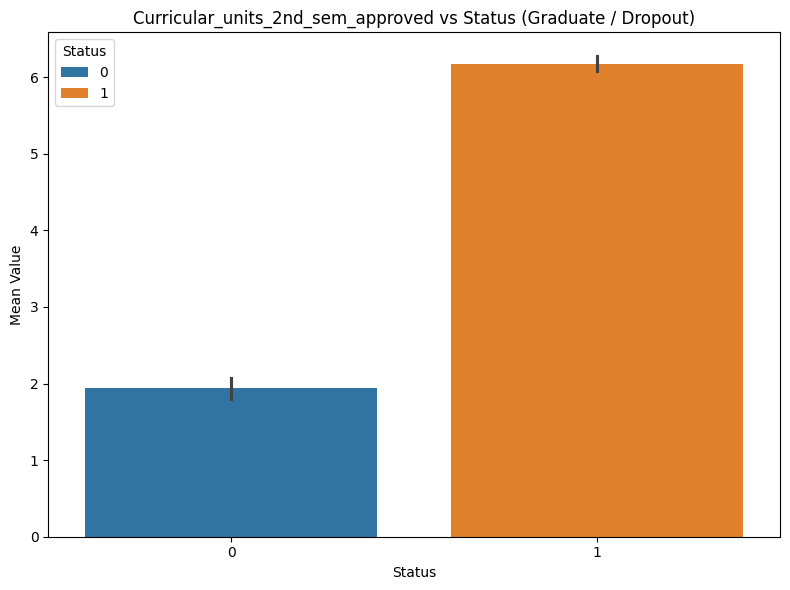

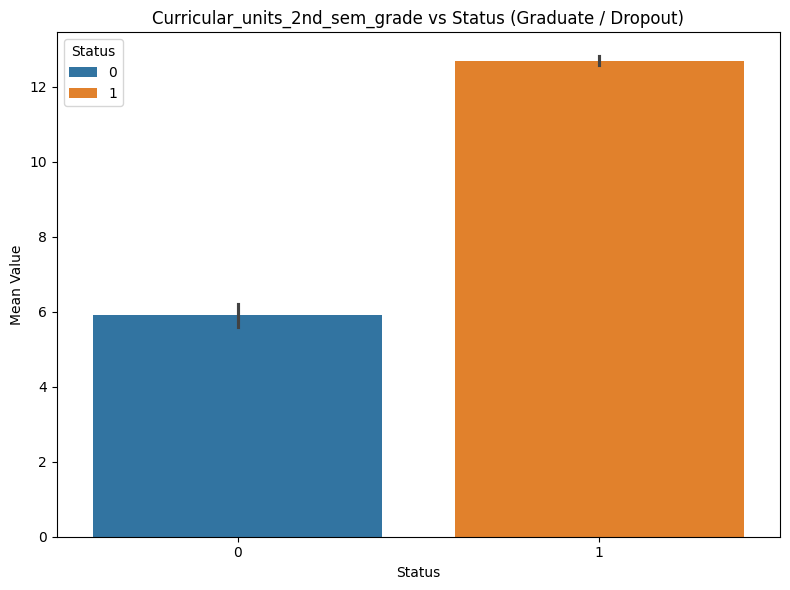

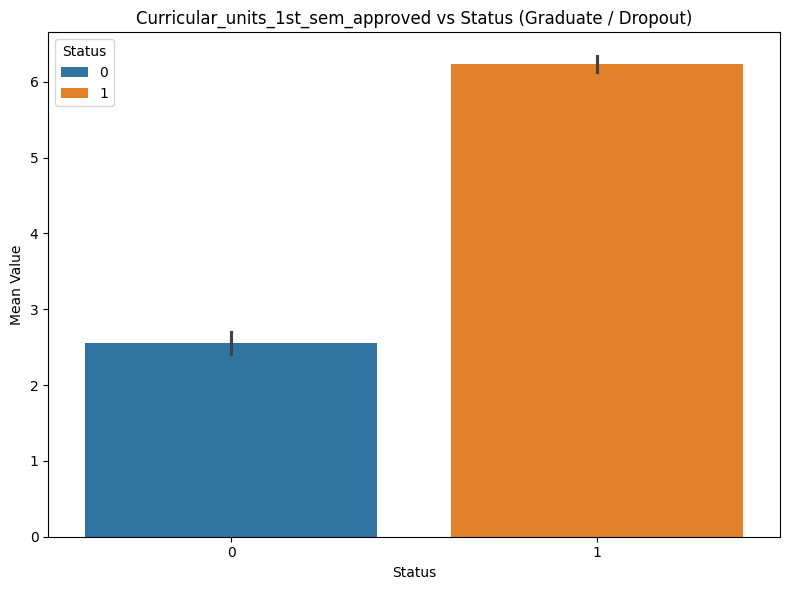

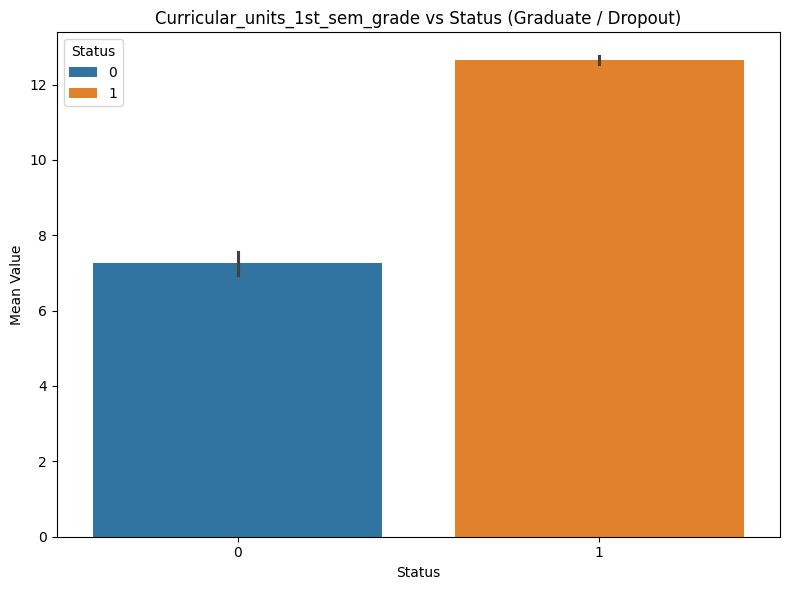

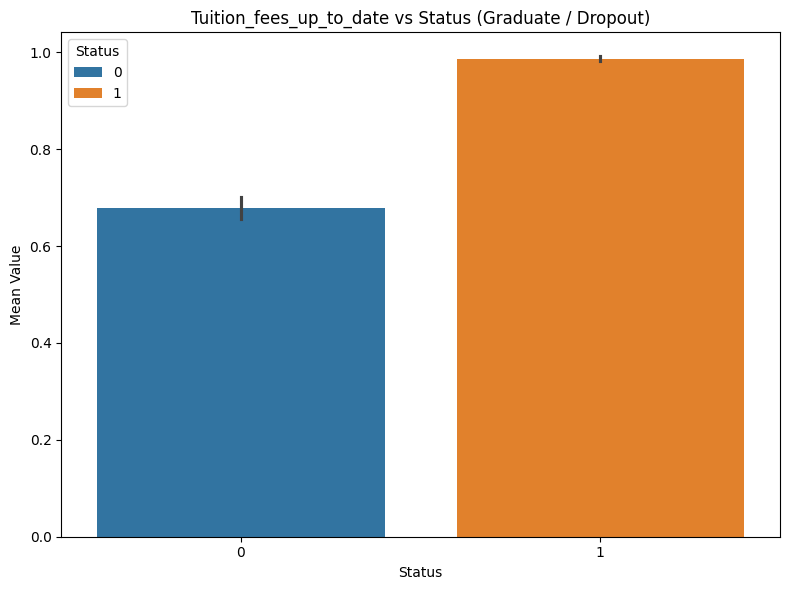

In [93]:
numerical_features = ['Curricular_units_2nd_sem_approved','Curricular_units_2nd_sem_grade','Curricular_units_1st_sem_approved','Curricular_units_1st_sem_grade','Tuition_fees_up_to_date']

for numerical in numerical_features:
    plt.figure(figsize=(8,6))
    sns.barplot(data=clean_df, x='Status', y=numerical, hue='Status')
    plt.title(f'{numerical} vs Status (Graduate / Dropout)')
    plt.ylabel('Mean Value')
    plt.xlabel('Status')
    plt.tight_layout()
    plt.show()

## Modeling

## Define Feature and Label

In [94]:
features_column = [
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_1st_sem_enrolled',
    'Admission_grade',
    'Displaced'
]

label_column = "Status"

In [95]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

### Data Split

In [96]:
X = clean_df[features_column]
y = clean_df[label_column]

# Model Split 80% training 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Check Data Split
print(f'Data Training : {X_train.shape[0]}')
print(f'Data Test : {X_test.shape[0]}')

Data Training : 2904
Data Test : 726


### Scaling numerical feature

In [97]:
X_train, X_test = scaling(features_column, X_train, X_test)

print(X_train.shape, " : ", X_test.shape)

(2904, 10)  :  (726, 10)


In [98]:
# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation

In [99]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8939
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.82      0.86       277
           1       0.90      0.94      0.92       449

    accuracy                           0.89       726
   macro avg       0.89      0.88      0.89       726
weighted avg       0.89      0.89      0.89       726



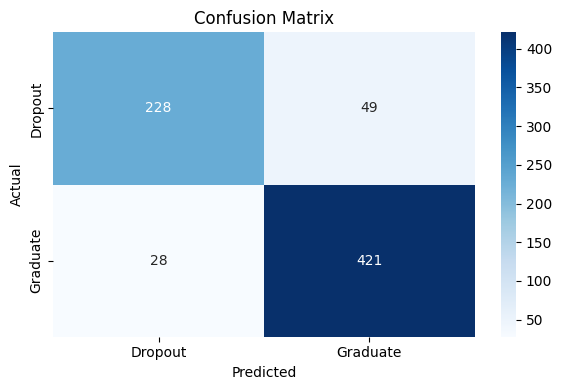

In [100]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Graduate'], yticklabels=['Dropout', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [101]:
joblib.dump(model, 'model/rf_model.pkl')

['model/rf_model.pkl']

In [102]:
clean_df.to_csv('clean_dataset.csv', index=False)
print("Dataset Berhasil disimpan sebagai clean_dataset.csv")

Dataset Berhasil disimpan sebagai clean_dataset.csv
